[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyCirclize/blob/main/docs/plot_tips.ipynb)

In [1]:
# %pip install pycirclize 

## Subplots

pyCirclize supports plotting to user-defined Polar Axes. Users can target subplot Polar Axes with the `circos.plotfig()` method to combine them with other plots.

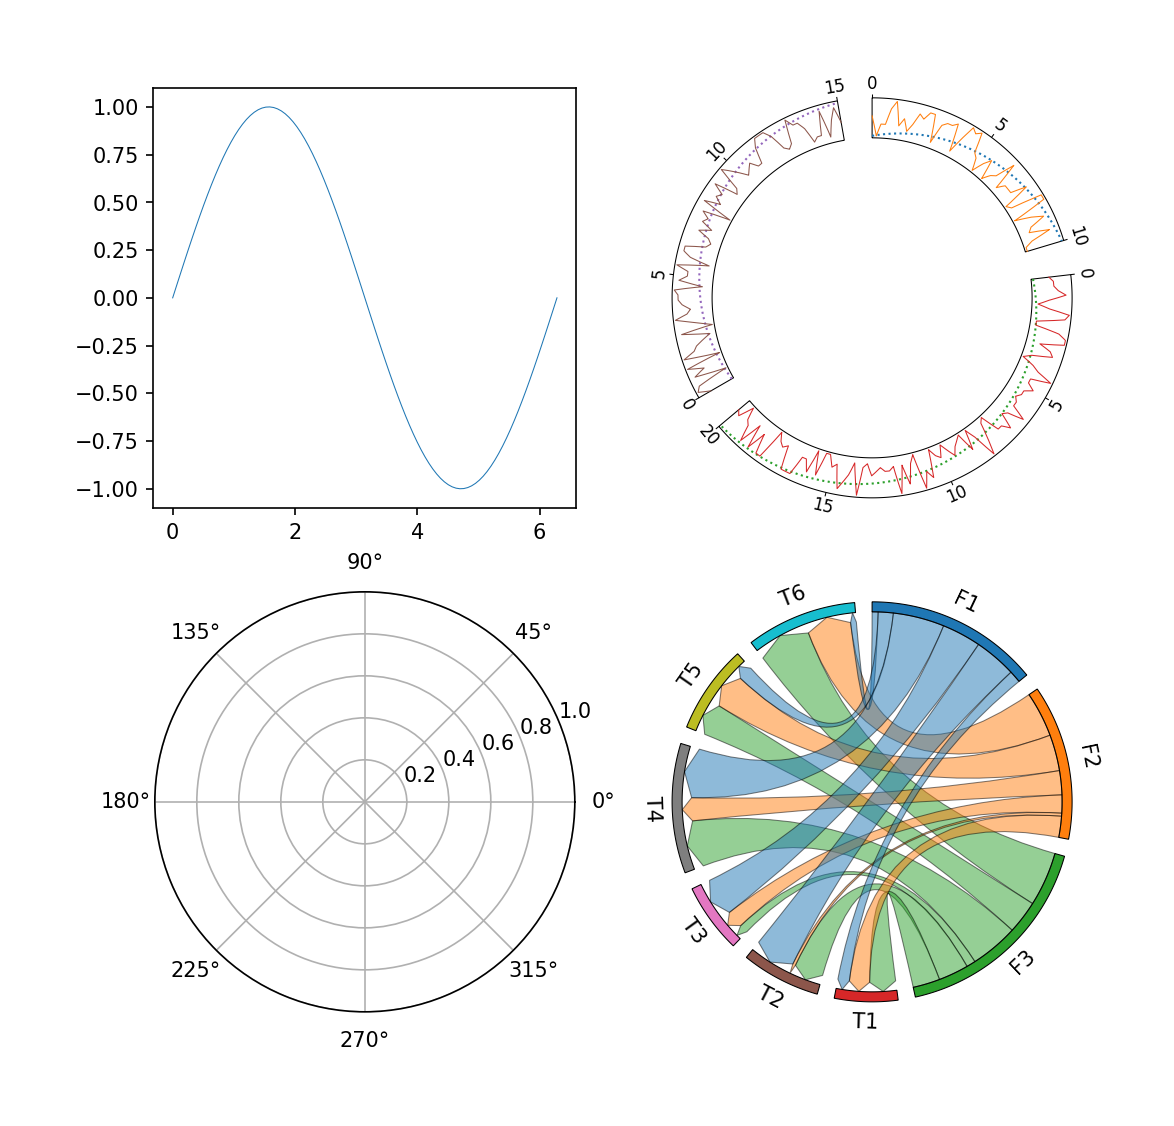

In [2]:
from pycirclize import Circos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

# Create 4 subplots
fig = plt.figure(figsize=(8, 8), dpi=150)
ax1 = fig.add_subplot(221)
polar_ax2 = fig.add_subplot(222, polar=True)
polar_ax3 = fig.add_subplot(223, polar=True)
polar_ax4 = fig.add_subplot(224, polar=True)

# Plot to first subplot (ax1)
x = np.linspace(0, 2 * np.pi, 100)
ax1.plot(x, np.sin(x))

# Plot circos to second subplot (polar_ax2)
sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=10)
for sector in circos.sectors:
    track = sector.add_track((80, 100), r_pad_ratio=0.1)
    track.axis()
    track.xticks_by_interval(5)
    vmin, vmax = 0, 10
    # Line between start-end two points
    track.line([track.start, track.end], [vmin, vmax], lw=1, ls="dotted")
    # Line of random value points
    x = np.linspace(track.start, track.end, int(track.size) * 5 + 1)
    y = np.random.randint(vmin, vmax, len(x))
    track.line(x, y)

fig = circos.plotfig(ax=polar_ax2)

# Plot chord diagram to fourth subplot (polar_ax4)
row_names = ["F1", "F2", "F3"]
col_names = ["T1", "T2", "T3", "T4", "T5", "T6"]
matrix_data = [
    [4, 14, 13, 17, 5, 2],
    [7, 1, 6, 8, 12, 15],
    [9, 10, 3, 16, 11, 18],
]
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)

circos = Circos.initialize_from_matrix(
    matrix_df,
    r_lim=(95, 100),
    space=5,
    cmap="tab10",
    link_kws=dict(ec="black", lw=0.5, direction=1),
)
fig = circos.plotfig(ax=polar_ax4)

## Grouping Sectors

In pyCirclize, the space size between sectors can be set arbitrarily. 
By using the `calc_group_spaces` function, users can easily get the sector space size setting 
within/between groups based on the number of groups.
Groups can be explicitly visualized as shown in the code example below.

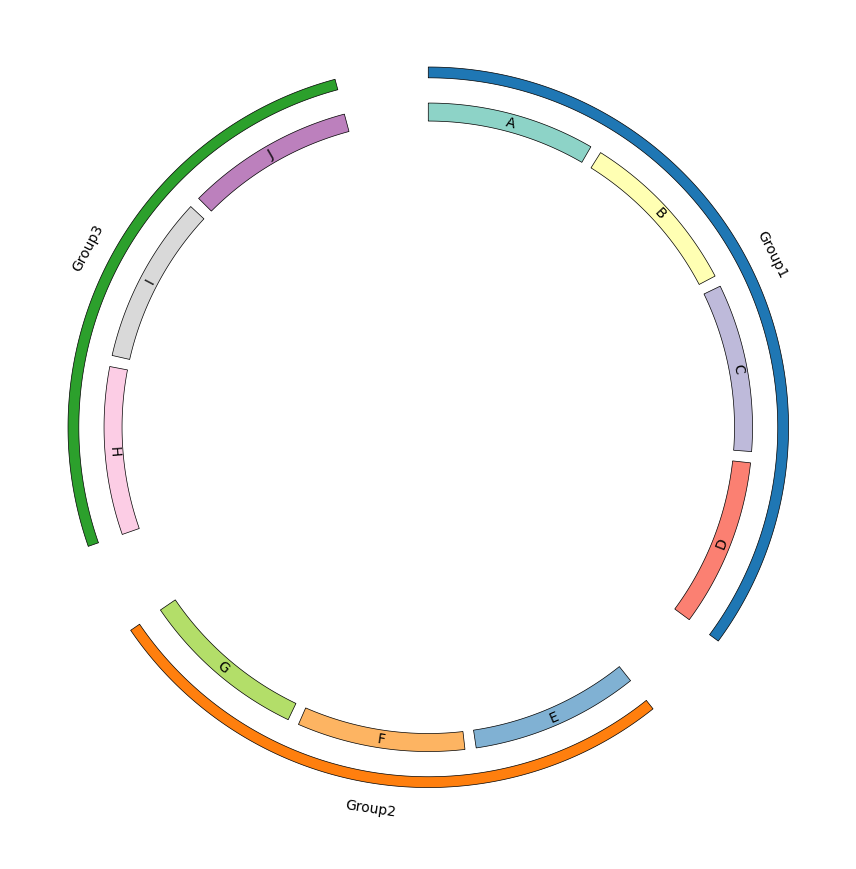

In [3]:
from pycirclize import Circos
from pycirclize.utils import calc_group_spaces, ColorCycler

sectors = {name: 10 for name in "ABCDEFGHIJ"}
group1, group2, group3 = list("ABCD"), list("EFG"), list("HIJ")

# Calculate appropriate group between/within spaces
# In this example, 10 sectors are displayed as groups dividied into [4, 3, 3]
spaces = calc_group_spaces([4, 3, 3], space_bw_group=15, space_in_group=2)
circos = Circos(sectors, space=spaces)

# Plot sector track
ColorCycler.set_cmap("Set3")
for sector in circos.sectors:
    track = sector.add_track(r_lim=(85, 90))
    track.axis(fc=ColorCycler())
    track.text(sector.name)

# Plot group sectors range
ColorCycler.set_cmap("tab10")
for idx, group in enumerate((group1, group2, group3), 1):
    group_deg_lim = circos.get_group_sectors_deg_lim(group)
    circos.rect(r_lim=(97, 100), deg_lim=group_deg_lim, fc=ColorCycler(), ec="black", lw=0.5)
    group_center_deg = sum(group_deg_lim) / 2
    circos.text(f"Group{idx}", r=105, deg=group_center_deg, adjust_rotation=True)

fig = circos.plotfig()